<h2> Create Random point </h2>

To generate a set of random data points for regression analysis, we first created 100 random values $x$ uniformly distributed in the interval $(0,10)$. We then used the function $y = \sin(x) - (\cos(x))^2$ to generate the corresponding $y$ values, adding some random noise to simulate real-life data. By adding noise to the data, we hoped to capture the inherent variability and uncertainty that is often present in real-world datasets.

The resulting dataset can be used to train and evaluate regression models, allowing us to explore the relationship between the independent variable $x$ and the dependent variable $y$. By using a combination of random values and a realistic function with added noise, we aimed to create a dataset that reflects the complexities and nuances of real-world data, while still providing a controlled and well-defined environment for testing and analysis.

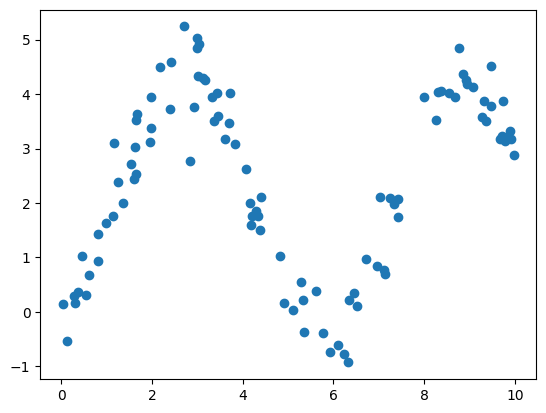

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

X = np.random.uniform(0,10,100)
y = np.sin(X) - np.cos(X)*2 + np.random.normal(2,0.5,100)

plt.scatter(X,y)
plt.show()

<h2> Locally weighted Algorithm </h2>

From the plot above, it is evident that the relationship between the variables is non-linear, and simple linear regression is unlikely to fit the data well. One possible solution is to use higher-degree polynomial regression, but this approach may be time-consuming and require extensive experimentation to find the best fit.
<br>
An alternative approach is to use <b><i>non-parametric algorithms</i></b>, which do not rely on explicit assumptions about the functional form of the relationship between the variables. In this case, a <b><i>locally weighted algorithm</i></b> may be appropriate, as it can adapt to the underlying structure of the data and provide a better fit.

In normal Linear Regression models, one commonly used optimization algorithm is gradient descent, which involves iteratively minimizing a cost function J that measures the difference between the predicted values and the actual values in the training data. The cost function J typically takes the form of the mean squared error (MSE), which is defined as the average of the squared differences between the predicted and actual values:
\begin{equation}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - h_\theta(X^{(i)}))^2 
\end{equation}
where 
\begin{equation}
h_\theta(x^{(i)}) = \theta^T X^{(i)}
\end{equation}
<br>
is the <b><i>Hypothesis Function</i></b>
To minimize the cost function, we use an optimization algorithm called gradient descent, which involves iteratively updating the model parameters until the cost function reaches a minimum. At each iteration, the parameters are updated in the opposite direction of the gradient of cost function with respect to , multiplied by a learning rate that determines the step size of the updates.

The update rule for the parameters is given by:

\begin{equation}
\theta_j := \theta_j - \alpha \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
\end{equation}

Compared to standard linear regression, the cost function for <b><i>locally weighted regression</i></b> is modified to incorporate weights that depend on the distance between the training examples and the test point. Specifically, the cost function for LWR is modified as below:
<br>

\begin{equation}
J(\theta) = \frac{1}{2} \sum_{i=1}^{m} w^{(i)} (y^{(i)} - \theta^T x^{(i)})^2 \\
w^{(i)} = \exp\left(-\frac{(x^{(i)} - x)^T(x^{(i)} - x)}{2\tau^2}\right)
\end{equation}

The <b><i>bandwidth parameter τ</i></b>
decides the width of the neighborhood you should look into to fit the local straight line.
In other words, τ
controls how quickly the weight of a training example x(i) falls off with distance from the query point x. Depending on the choice of τ, you choose a fatter or thinner bell-shaped curve

<h2>Ordinary Linear Regression Model </h2>

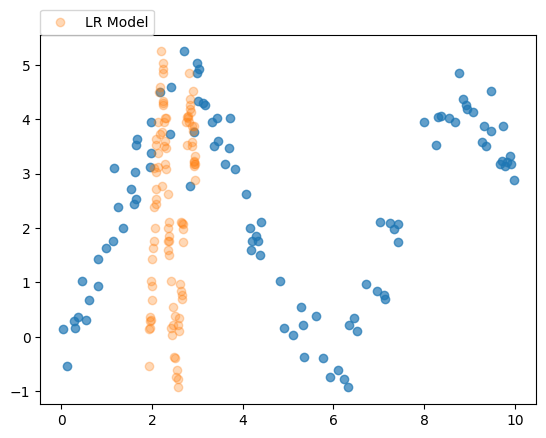

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X_reshaped = X.reshape(-1,1)
lr.fit(X_reshaped,y)

plt.scatter(X,y,alpha = 0.7)
plt.scatter(lr.predict(X_reshaped),y,
            label = 'LR Model',
           alpha = 0.3)

plt.legend(loc = (0,1))
plt.show()

The conventional linear regression model appears to exhibit a poor fit to the data, as evidenced by an irregular, non-linear shape that deviates from the expected linear trend.

<h2> Implement Locally Weighted Regression </h2>

It is important to note that the locally weighted regression algorithm has a <b><i>computational complexity of O(N^2)</i></b>, which means that its runtime increases quadratically with the size of the dataset.
<br>
Additionally, the LWR algorithm requires the <i>entire dataset to be stored in memory</i>, which can be a limiting factor for large datasets. These factors must be taken into consideration when using LWR, particularly when dealing with datasets that are too large to fit in memory or require real-time processing.

The photograph below depicts the implementation of the locally weighted regression algorithm.

<!-- ![](Algorithm_LWR.png) -->
<img src = 'Algorithm_LWR.png' style ='width: 750px; height:450px' />

In [3]:
class MB_LWR():
    def __init__(self,X,y,bandwidth):
        self.X = X
        self.y = y
        self.bandwidth = bandwidth
        
        self.m = len(X)
        
        self.X_hat = np.vstack([self.X,np.ones(len(self.X))])
        self.y_reshaped = np.array(y).reshape(self.m,1)
        
    def weight_matrix(self,vector_x,query_x):
        #weight matrix is a m*m matrix whose diagonal elements are obtained from weight function 
        power_to = np.array((vector_x - query_x)**2).transpose()/(2*math.pow(self.bandwidth,2))
        return np.exp(-1*power_to)
    
    def prediction(self,query_x):
        W = np.mat(np.eye(self.m))
        for i in range(self.m):
                point =  self.X[i]
                W[i,i] = self.weight_matrix(point,query_x)
                
        B = (np.linalg.pinv(self.X_hat*W*self.X_hat.transpose())*self.X_hat*W*self.y_reshaped)
            
        #query_hat equals vector (query_x,1)
        query_hat = np.append(query_x,np.array([1.0]))
        
        prediction = (np.dot(B.transpose(),query_hat))
        return prediction
        
        
    def algorithm(self,plot = True):
        j = 0
        for query_x in self.X:
            jvb = self.prediction(query_x)  
            if plot:
                #If else for legend in plot
                if j > 0:
                    plt.scatter(np.array([query_x]),np.array([jvb]),
                               color = 'red',
                               alpha = 0.3)
                else:
                    plt.scatter(np.array([query_x]),np.array([jvb]),
                           color = 'red',
                           alpha = 0.3,
                               label = 'Predictions')
            j+=1

<h2> Plot the Results </h2>

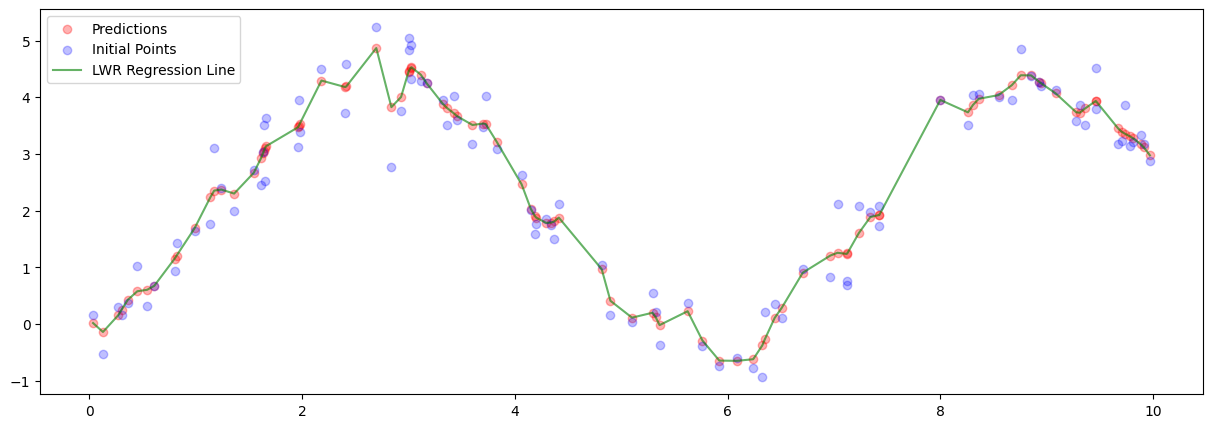

In [4]:
plt.figure(figsize = (15,5))           
            
mb_lwr = MB_LWR(X,y,0.1)
w = mb_lwr.algorithm(plot = True)

plt.scatter(X,y,
           color = 'blue',
           alpha = 0.25,
           label = 'Initial Points')

dict_ = {X[i]:y[i] for i in range(len(X))}
dict_ = dict(sorted(dict_.items(),key = lambda x:x[0]))

keys,values = list(dict_.keys()), list(dict_.values())

plot_line_lwr = MB_LWR(X = keys,y = values,bandwidth = 0.1)
Ys = []
for key in keys:
    prediction = (plot_line_lwr.prediction(key))
    Ys.append(np.array(prediction)[0])

plt.plot(keys,Ys,color = 'Green',
        alpha = 0.6,
        label = 'LWR Regression Line')

plt.legend()
plt.show()

The results indicate that the locally weighted regression algorithm has demonstrated superior performance compared to the conventional linear regression method. The LWR algorithm has been observed to provide a more accurate fit to the data, as evidenced by its ability to closely approximate the underlying pattern of the data points. This improved performance can be attributed to the LWR algorithm's ability to account for local variations in the data and to adjust the model parameters accordingly.

<h2> Measure the LWR Model </h2>

Unlike classification models, regression models cannot be evaluated using measures of accuracy such as precision or recall. Instead, the performance of a regression model is typically assessed by measuring the error between the predicted and actual values, using various metrics such as <b><i>mean squared error, mean absolute error, or R-squared</i></b>. These metrics provide a quantitative measure of the degree of deviation between the predicted and actual values, allowing for a more objective evaluation of the model's performance. By using appropriate error metrics, it is possible to assess the accuracy of a regression model and to compare the performance of different models or algorithms.

<h3> R2 - Squared </h3>

One commonly used method for evaluating the performance of a regression model is the R-squared (R2) score, which provides a measure of the proportion of variance in the dependent variable that is explained by the independent variables in the model. The formula for calculating the R2 score is given by:

\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2} \quad \text{where} \quad \bar{y} = \frac{\sum_{i = 1}^n (y_i)}{n}
\end{equation}

The R2 score ranges from 0 to 1, with a value of 1 indicating a perfect fit of the model to the data and a value of 0 indicating that the model does not explain any of the variance in the dependent variable.

In [5]:
from sklearn.metrics import r2_score

predicted = []
for x in X:
    prediction = mb_lwr.prediction(x)
    predicted.append(np.array(prediction)[0])

print('R2 Score is {}'.format(round(r2_score(y,predicted),4)))

R2 Score is 0.9624


As noted earlier, an R-squared (R2) score close to 1 indicates that the model fits the data well, with a high degree of accuracy and precision. Based on the R2 score obtained from the locally weighted regression model for the given dataset, it can be inferred that the model has demonstrated a strong performance and is able to accurately capture the underlying patterns and trends in the data. Therefore, the locally weighted regression algorithm can be considered as a highly effective method for modeling and analyzing datasets with similar characteristics.

<h3> Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) </h3>

In addition to the R-squared (R2) score, other commonly used metrics for evaluating the performance of a regression model are the mean squared error (MSE) and the root mean squared error (RMSE). The MSE represents the average of the squared differences between the predicted and actual values, while the RMSE is the square root of the MSE, providing a measure of the standard deviation of the differences between the predicted and actual values.

\begin{equation}
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 \quad RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
\end{equation}

The MSE and RMSE provides a measure of the standard deviation of the errors between the predicted and actual values, with a smaller value indicating a better fit of the model to the data. The range of possible values for the MSE and RMSE is from 0 to infinity, with lower values indicating a better model fit

In [6]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y,predicted,squared = True)
rmse = mean_squared_error(y,predicted,squared = False)

print('MSE : {}\nRMSE : {}'.format(round(mse,3),round(rmse,3)))

MSE : 0.102
RMSE : 0.319


As noted earlier, the mean squared error (MSE) and root mean squared error (RMSE) are commonly used metrics for evaluating the performance of a regression model. In the case of the locally weighted regression model applied to the given dataset, the values obtained for both the MSE and RMSE metrics are close to 0, indicating a high degree of accuracy and precision in the predictions of the dependent variable

<h2> Conclusion </h2>

Locally weighted regression is a type of linear regression model that can be used to address some of the limitations of ordinary linear regression. In certain cases, ordinary linear regression may not be appropriate due to non-linear relationships between the dependent and independent variables, or other factors that can result in poor model performance. Locally weighted regression can be used to address these issues, and has been shown to perform well in many regression problems.

One potential disadvantage of locally weighted regression is that it can be memory-intensive, requiring all of the data points to be stored in memory for prediction. This can be a significant challenge when dealing with large datasets containing millions of data points, and can lead to performance issues. Additionally, the time complexity of the algorithm is O(N^2), which can limit its efficacy and make model training time-consuming.

Despite these limitations, locally weighted regression remains a powerful tool for regression analysis, offering precise predictions and improved performance in many cases. By carefully considering the strengths and weaknesses of the algorithm, and using it appropriately in combination with other techniques, it is possible to leverage the power of locally weighted regression to build accurate and effective regression models.

<h3> References </h3>

<a href="https://www.ias.informatik.tu-darmstadt.de/uploads/Teaching/AutonomousLearningSystems/Englert_ALS_2012.pdf" target="_blank" rel="noopener noreferrer">Locally Weighted Learning - Peter Englert</a>
<br>
<a href = 'https://machinelearningmastery.com/regression-metrics-for-machine-learning/' tget = '_blank' rel = 'noopener noreferrer'> Regression Metrics for Machine Learning - Jason Brownlee </a>
<br>
<a href = 'https://medium.com/@amanbamrah/how-to-evaluate-the-accuracy-of-regression-results-b38e5512afd3' target = '_blank' rel = 'noopener no referrer'>How to Evaluate the Accuracy of Regression Results? - Aman Singh</a>
<br>
<a href = 'https://aman.ai/cs229/locally-weighted-linear-regression/#bandwidth-parameter' target = '_blank' rel = 'noopener noreferrer'>
CS229 • Locally Weighted Linear Regression - Aman Chadha</a> 